# Raw Data Input

In [1]:
import pandas as pd
df = pd.read_csv('C:/Users/John/School/MSD 696/breast-cancer-wisconsin-data/data.csv')

In [2]:
df.head()

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,NaN
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,NaN
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,NaN
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,NaN
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,NaN


In [3]:
#This shows that all attributes have data except for one 
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 33 columns):
id                         569 non-null int64
diagnosis                  569 non-null object
radius_mean                569 non-null float64
texture_mean               569 non-null float64
perimeter_mean             569 non-null float64
area_mean                  569 non-null float64
smoothness_mean            569 non-null float64
compactness_mean           569 non-null float64
concavity_mean             569 non-null float64
concave points_mean        569 non-null float64
symmetry_mean              569 non-null float64
fractal_dimension_mean     569 non-null float64
radius_se                  569 non-null float64
texture_se                 569 non-null float64
perimeter_se               569 non-null float64
area_se                    569 non-null float64
smoothness_se              569 non-null float64
compactness_se             569 non-null float64
concavity_se               569 non

# Data Cleaning

In [4]:
#Dropping a useless column that has no data.
df = df.drop(df.columns[32], axis=1)

In [5]:
#This shows that all attributes have data
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 32 columns):
id                         569 non-null int64
diagnosis                  569 non-null object
radius_mean                569 non-null float64
texture_mean               569 non-null float64
perimeter_mean             569 non-null float64
area_mean                  569 non-null float64
smoothness_mean            569 non-null float64
compactness_mean           569 non-null float64
concavity_mean             569 non-null float64
concave points_mean        569 non-null float64
symmetry_mean              569 non-null float64
fractal_dimension_mean     569 non-null float64
radius_se                  569 non-null float64
texture_se                 569 non-null float64
perimeter_se               569 non-null float64
area_se                    569 non-null float64
smoothness_se              569 non-null float64
compactness_se             569 non-null float64
concavity_se               569 non

In [6]:
#https://stackoverflow.com/questions/40901770/is-there-a-simple-way-to-change-a-column-of-yes-no-to-1-0-in-a-pandas-dataframe
#This is to change the diagnosis to a number so we can use the heatmap

df['diagnosis'] = df['diagnosis'].map({'M': 1, 'B': 0})

# Heat Map and other Data Visualizations

In [7]:
import matplotlib.pyplot as plt

from sklearn.neighbors import KNeighborsRegressor
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier

import seaborn as sns

C:\Users\John\Anaconda13\lib\site-packages\sklearn\ensemble\weight_boosting.py:29: DeprecationWarning: numpy.core.umath_tests is an internal NumPy module and should not be imported. It will be removed in a future NumPy release.
  from numpy.core.umath_tests import inner1d


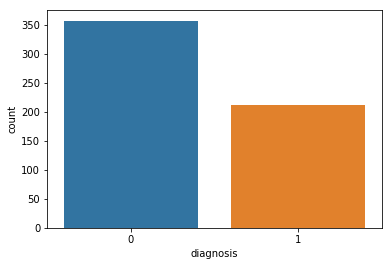

In [8]:
#Here we can see that there are more people with a benign tumor vs a malignant tumor
#1 is Malignant and 0 is Benign

sns.countplot(df['diagnosis'])

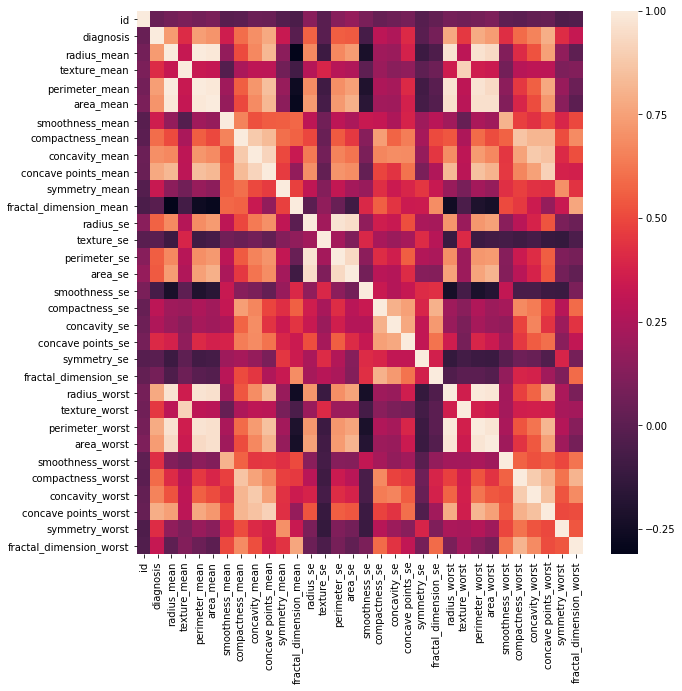

In [9]:
plt.subplots(figsize=(10,10))
_ = sns.heatmap(df.corr())
#here we can see the correlation between the items
# from looking at this heat map it appears that 'concave points_mean','radius_worst', 'perimeter_worst', 
# and 'concave points_worst' are the most highly related to the Diagnosis.

In [10]:
#https://levelup.gitconnected.com/pearson-coefficient-of-correlation-using-pandas-ca68ce678c04

pd.options.display.max_columns = None
pd.options.display.max_rows = None

pearsoncorr = df.corr(method='pearson')
pearsoncorr

#from the pearson model we can see that the top 5 attributes with the most correlation in predicting if the tumor is cancer 
#or not are:
#concave points_worst - 0.793566
#perimeter_worst - 0.782914
#concave points_mean - 0.776614
#radius_worst - 0.776454
#perimeter_mean - 0.742636


,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean,radius_se,texture_se,perimeter_se,area_se,smoothness_se,compactness_se,concavity_se,concave points_se,symmetry_se,fractal_dimension_se,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
id,1.000000,0.039769,0.074626,0.099770,0.073159,0.096893,-0.012968,0.000096,0.050080,0.044158,-0.022114,-0.052511,0.143048,-0.007526,0.137331,0.177742,0.096781,0.033961,0.055239,0.078768,-0.017306,0.025725,0.082405,0.064720,0.079986,0.107187,0.010338,-0.002968,0.023203,0.035174,-0.044224,-0.029866
diagnosis,0.039769,1.000000,0.730029,0.415185,0.742636,0.708984,0.358560,0.596534,0.696360,0.776614,0.330499,-0.012838,0.567134,-0.008303,0.556141,0.548236,-0.067016,0.292999,0.253730,0.408042,-0.006522,0.077972,0.776454,0.456903,0.782914,0.733825,0.421465,0.590998,0.659610,0.793566,0.416294,0.323872
radius_mean,0.074626,0.730029,1.000000,0.323782,0.997855,0.987357,0.170581,0.506124,0.676764,0.822529,0.147741,-0.311631,0.679090,-0.097317,0.674172,0.735864,-0.222600,0.206000,0.194204,0.376169,-0.104321,-0.042641,0.969539,0.297008,0.965137,0.941082,0.119616,0.413463,0.526911,0.744214,0.163953,0.007066
texture_mean,0.099770,0.415185,0.323782,1.000000,0.329533,0.321086,-0.023389,0.236702,0.302418,0.293464,0.071401,-0.076437,0.275869,0.386358,0.281673,0.259845,0.006614,0.191975,0.143293,0.163851,0.009127,0.054458,0.352573,0.912045,0.358040,0.343546,0.077503,0.277830,0.301025,0.295316,0.105008,0.119205
perimeter_mean,0.073159,0.742636,0.997855,0.329533,1.000000,0.986507,0.207278,0.556936,0.716136,0.850977,0.183027,-0.261477,0.691765,-0.086761,0.693135,0.744983,-0.202694,0.250744,0.228082,0.407217,-0.081629,-0.005523,0.969476,0.303038,0.970387,0.941550,0.150549,0.455774,0.563879,0.771241,0.189115,0.051019
area_mean,0.096893,0.708984,0.987357,0.321086,0.986507,1.000000,0.177028,0.498502,0.685983,0.823269,0.151293,-0.283110,0.732562,-0.066280,0.726628,0.800086,-0.166777,0.212583,0.207660,0.372320,-0.072497,-0.019887,0.962746,0.287489,0.959120,0.959213,0.123523,0.390410,0.512606,0.722017,0.143570,0.003738
smoothness_mean,-0.012968,0.358560,0.170581,-0.023389,0.207278,0.177028,1.000000,0.659123,0.521984,0.553695,0.557775,0.584792,0.301467,0.068406,0.296092,0.246552,0.332375,0.318943,0.248396,0.380676,0.200774,0.283607,0.213120,0.036072,0.238853,0.206718,0.805324,0.472468,0.434926,0.503053,0.394309,0.499316
compactness_mean,0.000096,0.596534,0.506124,0.236702,0.556936,0.498502,0.659123,1.000000,0.883121,0.831135,0.602641,0.565369,0.497473,0.046205,0.548905,0.455653,0.135299,0.738722,0.570517,0.642262,0.229977,0.507318,0.535315,0.248133,0.590210,0.509604,0.565541,0.865809,0.816275,0.815573,0.510223,0.687382
concavity_mean,0.050080,0.696360,0.676764,0.302418,0.716136,0.685983,0.521984,0.883121,1.000000,0.921391,0.500667,0.336783,0.631925,0.076218,0.660391,0.617427,0.098564,0.670279,0.691270,0.683260,0.178009,0.449301,0.688236,0.299879,0.729565,0.675987,0.448822,0.754968,0.884103,0.861323,0.409464,0.514930
concave points_mean,0.044158,0.776614,0.822529,0.293464,0.850977,0.823269,0.553695,0.831135,0.921391,1.000000,0.462497,0.166917,0.698050,0.021480,0.710650,0.690299,0.027653,0.490424,0.439167,0.615634,0.095351,0.257584,0.830318,0.292752,0.855923,0.809630,0.452753,0.667454,0.752399,0.910155,0.375744,0.368661


In [11]:
Spearmancorr = df.corr(method='spearman')
Spearmancorr

#from the spearman model we can see that the top 4 attributes with the most correlation in predicting if the tumor is cancer 
#or not are

#perimeter_worst - 0.796319
#radius_worst - 0.787933
#area_worst - 0.786902
#concave points_worst - 0.781674
#concave points_mean - 0.777877



,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean,radius_se,texture_se,perimeter_se,area_se,smoothness_se,compactness_se,concavity_se,concave points_se,symmetry_se,fractal_dimension_se,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
id,1.000000,-0.079866,0.043740,0.125809,0.043374,0.042829,-0.073225,-0.002247,0.000657,-0.003174,-0.001102,-0.087017,-0.016157,0.032837,0.002656,0.002448,0.020673,0.037236,0.029344,0.016625,-0.028736,-0.020282,0.025451,0.077484,0.026199,0.023137,-0.080853,-0.011300,-0.013284,-0.012798,-0.064977,-0.090637
diagnosis,-0.079866,1.000000,0.732785,0.461971,0.748496,0.734122,0.371892,0.609288,0.733308,0.777877,0.332567,-0.025903,0.616912,0.019419,0.630411,0.714184,-0.052193,0.380666,0.470338,0.488717,-0.092303,0.201492,0.787933,0.476720,0.796319,0.786902,0.425513,0.606810,0.705734,0.781674,0.396843,0.311477
radius_mean,0.043740,0.732785,1.000000,0.340956,0.997802,0.999602,0.148510,0.497578,0.645728,0.759702,0.120242,-0.349931,0.550247,-0.144499,0.565520,0.738077,-0.326385,0.264904,0.364555,0.410576,-0.241376,-0.008411,0.978604,0.314911,0.971555,0.978863,0.125789,0.491357,0.596043,0.727265,0.174698,0.044564
texture_mean,0.125809,0.461971,0.340956,1.000000,0.348142,0.344145,0.024649,0.266499,0.342646,0.306891,0.110130,-0.059303,0.363621,0.450720,0.386813,0.395139,0.037048,0.263591,0.287188,0.238610,0.008945,0.147605,0.366547,0.909218,0.375273,0.368335,0.101401,0.290917,0.339725,0.319235,0.120693,0.116144
perimeter_mean,0.043374,0.748496,0.997802,0.348142,1.000000,0.997068,0.182923,0.543925,0.681958,0.788629,0.150049,-0.304891,0.560326,-0.137578,0.582789,0.745824,-0.311147,0.308620,0.402277,0.441996,-0.228187,0.032429,0.981244,0.323109,0.978980,0.980864,0.156611,0.534565,0.632106,0.757526,0.199007,0.088961
area_mean,0.042829,0.734122,0.999602,0.344145,0.997068,1.000000,0.138053,0.488988,0.642557,0.755165,0.113928,-0.358425,0.553388,-0.142469,0.568237,0.741518,-0.327431,0.260362,0.362308,0.406468,-0.243507,-0.012688,0.979258,0.318178,0.971822,0.980264,0.119712,0.485813,0.593736,0.723390,0.170860,0.038758
smoothness_mean,-0.073225,0.371892,0.148510,0.024649,0.182923,0.138053,1.000000,0.678806,0.518511,0.565172,0.542228,0.588465,0.334282,0.091283,0.331360,0.296059,0.338692,0.392455,0.354730,0.438826,0.150740,0.413429,0.203453,0.060645,0.226345,0.191735,0.796085,0.481384,0.429107,0.498868,0.393579,0.511457
compactness_mean,-0.002247,0.609288,0.497578,0.266499,0.543925,0.488988,0.678806,1.000000,0.896518,0.848295,0.552203,0.499195,0.506582,0.047766,0.583520,0.539511,0.127381,0.817875,0.772283,0.732425,0.098388,0.621121,0.542626,0.255305,0.592254,0.531590,0.578902,0.901029,0.837921,0.825473,0.450333,0.688986
concavity_mean,0.000657,0.733308,0.645728,0.342646,0.681958,0.642557,0.518511,0.896518,1.000000,0.927352,0.446793,0.258174,0.575277,0.051318,0.646199,0.644344,0.070321,0.761230,0.858306,0.774656,0.022753,0.513593,0.682316,0.335866,0.722424,0.676628,0.488775,0.849985,0.938543,0.904938,0.383667,0.541838
concave points_mean,-0.003174,0.777877,0.759702,0.306891,0.788629,0.755165,0.565172,0.848295,0.927352,1.000000,0.423767,0.142659,0.635054,0.008710,0.679841,0.726982,0.016798,0.608388,0.674668,0.758438,-0.028353,0.378374,0.787411,0.300562,0.813960,0.780395,0.490035,0.758309,0.827281,0.937075,0.355477,0.421110


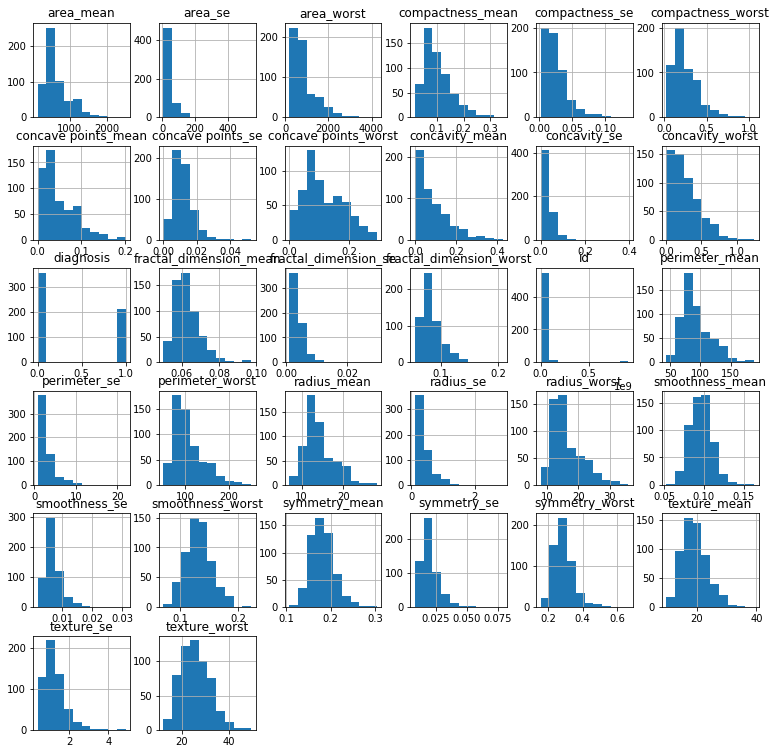

In [12]:
#this shows the histograms for all of the features 

df.hist(figsize = (13, 13))
plt.show()


C:\Users\John\Anaconda13\lib\site-packages\ipykernel_launcher.py:8: FutureWarning: pandas.scatter_matrix is deprecated. Use pandas.plotting.scatter_matrix instead
  


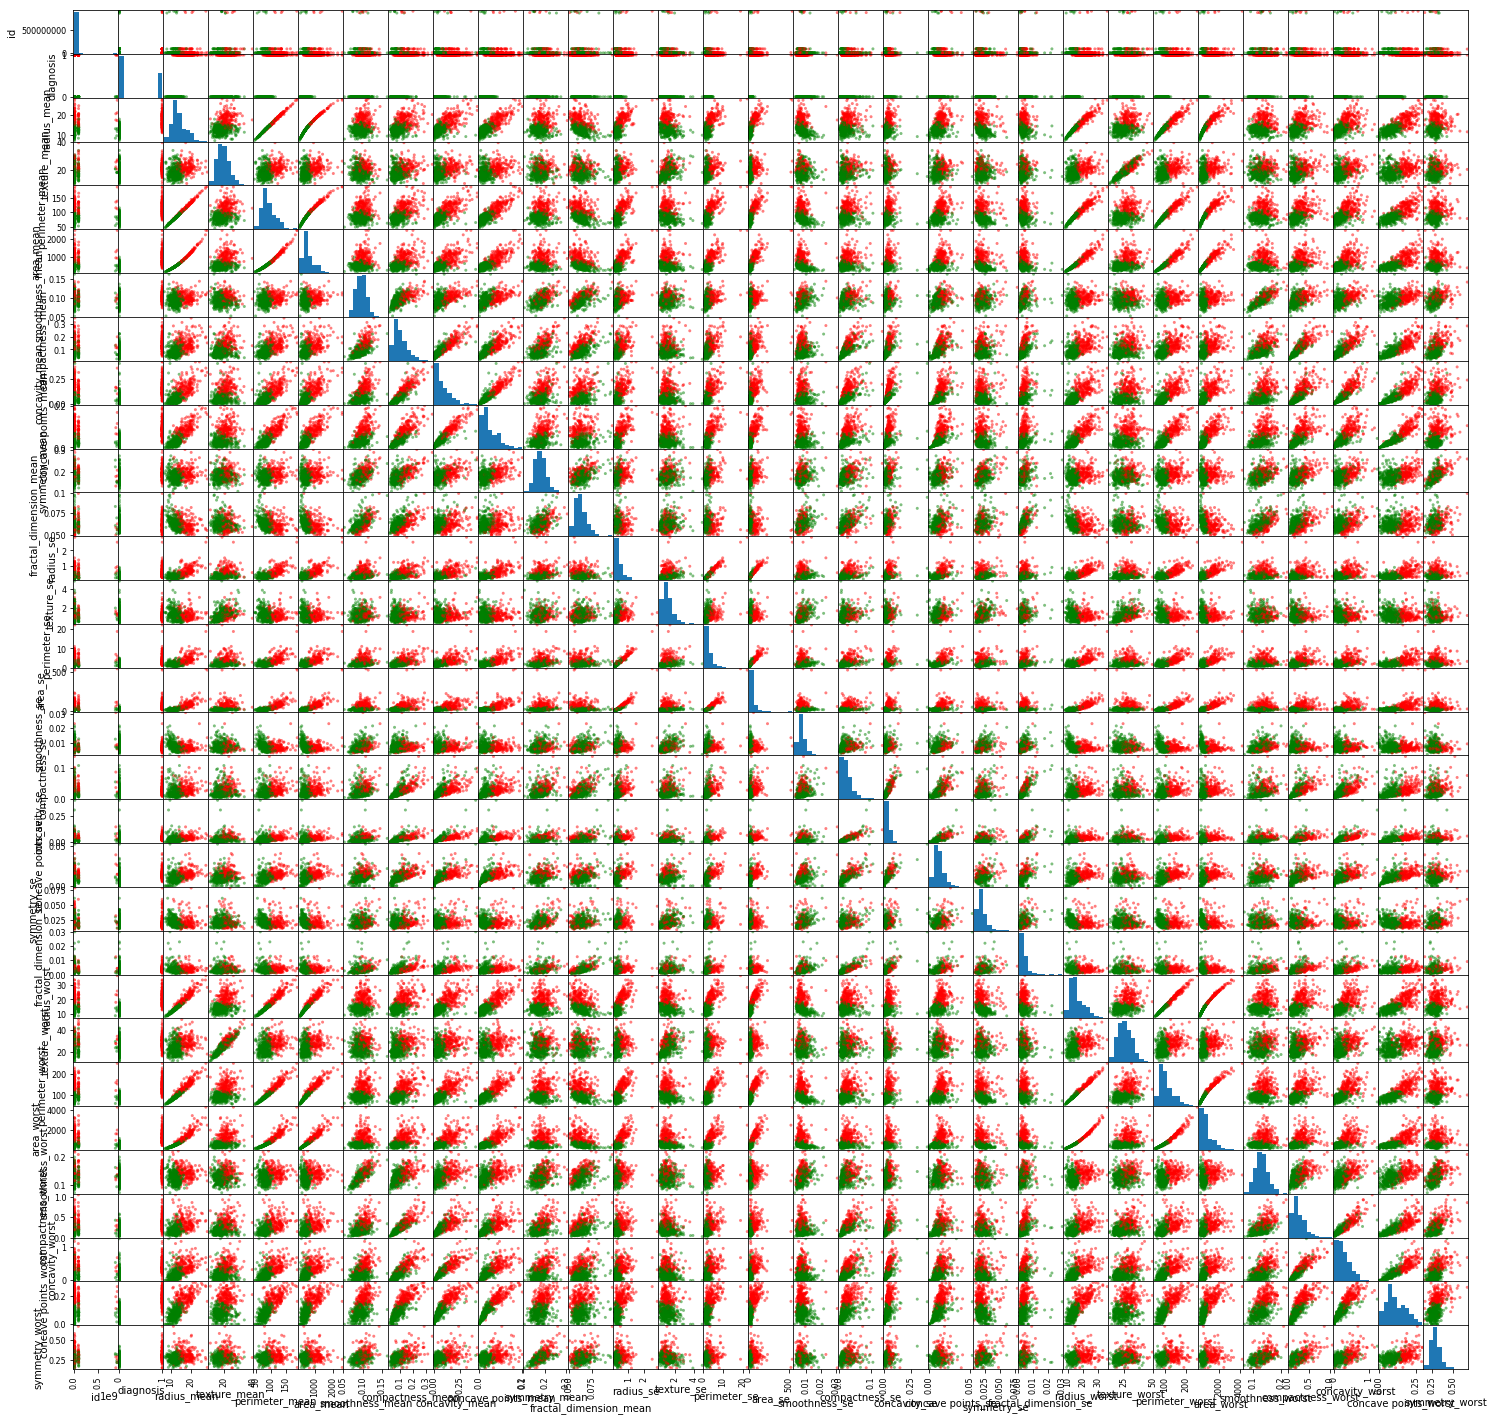

In [13]:
#Here we can see how the heat map from about displays the information on if the data belongs to someone with a tumor 
# that is cancer or someone with a tumor that is not cancer.

col_names = df.columns
features = col_names[:-1]
color = {0: "green", 1: "red"} 
plot = df["diagnosis"].map(lambda x: color.get(x))
pd.scatter_matrix(df[features], c=plot, figsize = (25, 25));

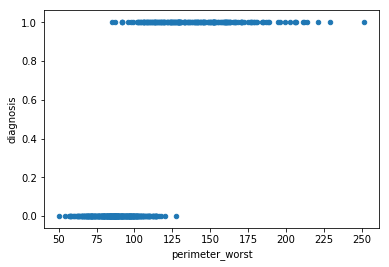

In [14]:
#From the heatmaps above it appears that the true most important feature with an average correlation score of 0.7896165
#is perimeter_worst

#from this simple plot we can see that the larger the perimeter at its worst the more likely it is to be cancer.
#you can see that there is quite a bit of overlap from around 75 to around 125, in these cases there is a lot of overlap between
#cancer or not cancer.  For this reason, we cannot just go off of the perimeter at its worst to determine if the tumor is cancer
df.plot(y='diagnosis', x='perimeter_worst', kind='scatter') 
plt.show()


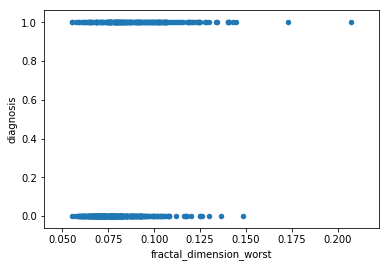

In [15]:
#from this simple plot we can see that not all of the attributes are useful in identifying if the tumor is cancer or now
#going off of the fractal dimension worst we can see that the majority of this data overlaps and does not help us identify if 
#the tumor is cancer or not.

df.plot(y='diagnosis', x='fractal_dimension_worst', kind='scatter') 
plt.show()

# Modeling

In [16]:
cols = df.columns

prediction_col = 'diagnosis'
feature_cols = [c for c in cols if c != prediction_col]
X = df[feature_cols].values
y = df[prediction_col].values

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1313)

In [17]:
model = KNeighborsRegressor(n_neighbors=1)
model.fit(X_train, y_train)

preds = model.predict(X_test)

In [18]:
print('Actuals for test data set')
print(y_test)
print('Predictions for test data set')
print(preds)

Actuals for test data set
[0 0 0 0 0 0 1 1 1 1 0 0 0 1 1 0 0 1 0 1 1 1 0 1 0 0 1 0 0 0 1 1 0 1 1 0 1
 1 1 0 0 1 0 1 0 0 0 0 0 1 1 0 0 1 1 1 0 0 1 0 0 1 1 0 0 1 0 1 0 1 0 0 0 0
 1 1 0 1 1 1 0 0 1 0 0 0 1 0 0 0 1 1 1 0 0 0 0 0 0 0 1 0 1 0 0 1 0 0 0 1 0
 0 1 0]
Predictions for test data set
[1. 0. 0. 0. 0. 0. 0. 1. 1. 1. 1. 0. 0. 1. 0. 0. 0. 0. 0. 1. 1. 1. 0. 1.
 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 1. 1. 0. 1. 0. 0. 0. 0. 1. 0. 0. 0. 1.
 0. 0. 1. 0. 0. 1. 1. 1. 0. 1. 1. 0. 1. 1. 1. 0. 0. 0. 0. 1. 0. 1. 0. 0.
 0. 1. 1. 0. 0. 0. 1. 1. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 1. 1. 1. 0. 0. 1.
 0. 0. 0. 0. 1. 0. 1. 0. 0. 1. 0. 0. 0. 1. 0. 0. 1. 0.]


In [19]:
#Here we are looking at the differences between the Actuals for test data set (y_test) 
#and Predictions for test data set (preds = model.predict(X_test))
differs = y_test - preds
print('Differences between the two sets')
print(differs)

Differences between the two sets
[-1.  0.  0.  0.  0.  0.  1.  0.  0.  0. -1.  0.  0.  0.  1.  0.  0.  1.
  0.  0.  0.  0.  0.  0.  0.  0.  1.  0.  0.  0.  1.  0.  0.  1.  1. -1.
  0.  1.  0.  0.  0.  1.  0.  0.  0.  0.  0. -1.  0.  1.  0.  0.  0.  0.
  0.  0.  0. -1.  0.  0. -1.  0.  0.  0.  0.  1.  0.  0.  0.  0.  0.  0.
  0. -1.  0.  1.  0.  1.  0.  0.  0.  0.  1. -1.  0.  0.  1.  0.  0.  0.
  0.  0.  0.  0.  0. -1.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.
  0.  0.  0.  0.  0.  0.]


In [20]:
#Running a simple K Neighbors Regressor we only have an accuracy score of 78.95%
#This is an issue because this mean that we are misdiagnosing patients nearly 1 out of every 4 times.

print (accuracy_score(y_test, preds))

0.7894736842105263


In [21]:
from sklearn.metrics import cohen_kappa_score

cohen_kappa_score(y_test, preds)

# https://www.statisticshowto.com/cohens-kappa-statistic/

# with a Cohens Kappa Score between 0.41 – 0.60 we can see that this model has a moderate agreement.
# this shows that this model is moderately due to the logic of the model and not based off of chance

0.5571382324376821

In [22]:
from sklearn.metrics import confusion_matrix 
from sklearn.metrics import accuracy_score 
from sklearn.metrics import classification_report

actual = y_test
predicted = preds
results = confusion_matrix(actual, predicted) 
print ('Confusion Matrix :')
print(results) 
print("")
print ('Accuracy Score :',accuracy_score(actual, predicted))
print("")
print ('Report : ')
print (classification_report(actual, predicted))

#according to these results it mispredicted 24 patients. 
#the model predicted that 9 people had cancer when they truly did not
#and the model missed nearly 1/3rd of all cancer diagnoses


Confusion Matrix :
[[58  9]
 [15 32]]

Accuracy Score : 0.7894736842105263

Report : 
             precision    recall  f1-score   support

          0       0.79      0.87      0.83        67
          1       0.78      0.68      0.73        47

avg / total       0.79      0.79      0.79       114



At this point I realized that I still had ID included in the attributes and because that is a unique number for each patient I think that might be throwing off my total, so here I am about to rerun all of my data from above to see if the K Neighbors Regressor improves with the removal of ID.  Because the ID is random regardless of the outcome of the tumor, we know the accuracy will increase.

In [23]:
df = pd.read_csv('C:/Users/John/School/MSD 696/breast-cancer-wisconsin-data/data.csv')

In [24]:
#Droping a useless column that has no data.
df = df.drop(df.columns[32], axis=1)

#Droping a useless column that has no data.
df = df.drop(df.columns[0], axis=1)

In [25]:
df.head()

,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean,radius_se,texture_se,perimeter_se,area_se,smoothness_se,compactness_se,concavity_se,concave points_se,symmetry_se,fractal_dimension_se,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,1.0950,0.9053,8.589,153.40,0.006399,0.04904,0.05373,0.01587,0.03003,0.006193,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,0.5435,0.7339,3.398,74.08,0.005225,0.01308,0.01860,0.01340,0.01389,0.003532,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,0.7456,0.7869,4.585,94.03,0.006150,0.04006,0.03832,0.02058,0.02250,0.004571,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,0.4956,1.1560,3.445,27.23,0.009110,0.07458,0.05661,0.01867,0.05963,0.009208,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,0.7572,0.7813,5.438,94.44,0.011490,0.02461,0.05688,0.01885,0.01756,0.005115,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


In [26]:
#This shows that all attributes have data
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 31 columns):
diagnosis                  569 non-null object
radius_mean                569 non-null float64
texture_mean               569 non-null float64
perimeter_mean             569 non-null float64
area_mean                  569 non-null float64
smoothness_mean            569 non-null float64
compactness_mean           569 non-null float64
concavity_mean             569 non-null float64
concave points_mean        569 non-null float64
symmetry_mean              569 non-null float64
fractal_dimension_mean     569 non-null float64
radius_se                  569 non-null float64
texture_se                 569 non-null float64
perimeter_se               569 non-null float64
area_se                    569 non-null float64
smoothness_se              569 non-null float64
compactness_se             569 non-null float64
concavity_se               569 non-null float64
concave points_se          569 n

In [27]:
#https://stackoverflow.com/questions/40901770/is-there-a-simple-way-to-change-a-column-of-yes-no-to-1-0-in-a-pandas-dataframe
#This is to change the diagnosis to a number so we can use the heatmap

df['diagnosis'] = df['diagnosis'].map({'M': 1, 'B': 0})

There is no need to rerun the Heat maps because each of those comparisons is independent of the ID column except for when comparing to the ID attribute.

In [28]:
cols = df.columns

prediction_col = 'diagnosis'
feature_cols = [c for c in cols if c != prediction_col]
X = df[feature_cols].values
y = df[prediction_col].values

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1313)

In [29]:
model = KNeighborsRegressor(n_neighbors=1)
model.fit(X_train, y_train)

preds = model.predict(X_test)

In [30]:
print('Actuals for test data set')
print(y_test)
print('Predictions for test data set')
print(preds)

Actuals for test data set
[0 0 0 0 0 0 1 1 1 1 0 0 0 1 1 0 0 1 0 1 1 1 0 1 0 0 1 0 0 0 1 1 0 1 1 0 1
 1 1 0 0 1 0 1 0 0 0 0 0 1 1 0 0 1 1 1 0 0 1 0 0 1 1 0 0 1 0 1 0 1 0 0 0 0
 1 1 0 1 1 1 0 0 1 0 0 0 1 0 0 0 1 1 1 0 0 0 0 0 0 0 1 0 1 0 0 1 0 0 0 1 0
 0 1 0]
Predictions for test data set
[0. 0. 0. 0. 0. 0. 1. 1. 1. 1. 0. 0. 0. 1. 1. 0. 0. 0. 0. 0. 1. 1. 0. 1.
 0. 0. 1. 0. 0. 0. 1. 0. 0. 1. 0. 1. 1. 1. 0. 0. 0. 1. 0. 1. 0. 0. 0. 0.
 0. 1. 1. 0. 0. 1. 1. 1. 0. 0. 1. 0. 0. 1. 1. 1. 0. 1. 0. 1. 0. 1. 0. 0.
 0. 0. 1. 1. 0. 1. 1. 0. 0. 0. 1. 0. 0. 0. 1. 0. 0. 0. 1. 1. 1. 0. 0. 0.
 0. 0. 0. 0. 1. 0. 1. 0. 0. 1. 1. 0. 0. 1. 0. 0. 1. 0.]


In [31]:
#Here we are looking at the differences between the Actuals for test data set (y_test) 
#and Predictions for test data set (preds = model.predict(X_test))
differs = y_test - preds
print('Differences between the two sets')
print(differs)

Differences between the two sets
[ 0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  1.
  0.  1.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  1.  0.  0.  1. -1.
  0.  0.  1.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.
  0.  0.  0.  0.  0.  0.  0.  0.  0. -1.  0.  0.  0.  0.  0.  0.  0.  0.
  0.  0.  0.  0.  0.  0.  0.  1.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.
  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0. -1.  0.
  0.  0.  0.  0.  0.  0.]


In [32]:
#Running a simple K Neighbors Regressor we have an accuracy score of 92.105%
#this shows how getting rid of useless data truly helps increase the accuracy of the model

print (accuracy_score(y_test, preds))

0.9210526315789473


In [33]:
cohen_kappa_score(y_test, preds)

# https://www.statisticshowto.com/cohens-kappa-statistic/
# with a Cohens Kappa Score between 0.81 – 0.99 we can see that this model has a near perfect agreement
# this shows that this model is completely due to the logic of the model and not based off of chance.

# This score is much better than when we had the ID column still included.  This shows that the ID column really impacted
# the model and made the model 'guess' more often than actually predict off of logic.

0.8355242064764348

In [34]:
#This is a Confusion Matrix from the K Neighbors Regressor with the accuracy score

actual = y_test
predicted = preds
results = confusion_matrix(actual, predicted) 
print ('Confusion Matrix :')
print(results) 
print("")
print ('Accuracy Score :',accuracy_score(actual, predicted))
print("")
print ('Report : ')
print (classification_report(actual, predicted))

#according to these results it mispredicted 9 patients. 
#the model predicted that 3 people had cancer when they truly did not, this is much better than my original run
#and the model missed only 12.77% of all cancer diagnoses which is much better than the 31.92% incorrect before

#since we are dealing with medial data this is still much too high of an error rate.

Confusion Matrix :
[[64  3]
 [ 6 41]]

Accuracy Score : 0.9210526315789473

Report : 
             precision    recall  f1-score   support

          0       0.91      0.96      0.93        67
          1       0.93      0.87      0.90        47

avg / total       0.92      0.92      0.92       114



In [35]:
cols_names = df.columns

prediction_col = 'diagnosis'
features = [c for c in cols if c != prediction_col]
X = df[feature_cols].values
y = df[prediction_col].values

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1313)

In [36]:
features

['radius_mean',
 'texture_mean',
 'perimeter_mean',
 'area_mean',
 'smoothness_mean',
 'compactness_mean',
 'concavity_mean',
 'concave points_mean',
 'symmetry_mean',
 'fractal_dimension_mean',
 'radius_se',
 'texture_se',
 'perimeter_se',
 'area_se',
 'smoothness_se',
 'compactness_se',
 'concavity_se',
 'concave points_se',
 'symmetry_se',
 'fractal_dimension_se',
 'radius_worst',
 'texture_worst',
 'perimeter_worst',
 'area_worst',
 'smoothness_worst',
 'compactness_worst',
 'concavity_worst',
 'concave points_worst',
 'symmetry_worst',
 'fractal_dimension_worst']

In [37]:
#This creates a Gaussian Classifier
#The random forest has 100 trees

clf=RandomForestClassifier(n_estimators=100,random_state=1313)

In [38]:
model = clf.fit(X_train,y_train)

In [39]:
preds = model.predict(X_test)

In [40]:
#here we see that the random forest on predicting the status of the tumor
model.score(X_test, y_test)

0.9473684210526315

In [41]:
cohen_kappa_score(y_test, preds)

# https://www.statisticshowto.com/cohens-kappa-statistic/
# with a Cohens Kappa Score between 0.81 – 0.99 we can see that this model has a near perfect agreement
# this shows that this model is completely due to the logic of the model and not based off of chance.

0.8906999041227229

In [42]:
# Here I am using the sklearn Accuracy score just to verify that my model score
# from above is correct, and it is.

ac = accuracy_score(y_test,clf.predict(X_test))
print('Accuracy is: ',ac)

Accuracy is:  0.9473684210526315


In [43]:
#This is a Confusion Matrix from the Random Forest with the accuracy score
# here is a summary of everything 
actual = y_test
predicted = preds
results = confusion_matrix(actual, predicted) 
print ('Confusion Matrix :')
print(results) 
print("")
print ('Accuracy Score :',accuracy_score(actual, predicted))
print("")
print ('Report : ')
print (classification_report(actual, predicted) )

#according to these results it mispredicted 6 of the tumors

Confusion Matrix :
[[65  2]
 [ 4 43]]

Accuracy Score : 0.9473684210526315

Report : 
             precision    recall  f1-score   support

          0       0.94      0.97      0.96        67
          1       0.96      0.91      0.93        47

avg / total       0.95      0.95      0.95       114



In [44]:
list(zip(features,model.feature_importances_))
#Here we can see which items have the most importance in determining the state of the tumor

[('radius_mean', 0.0410609852469997),
 ('texture_mean', 0.011177305632629997),
 ('perimeter_mean', 0.06313911818401376),
 ('area_mean', 0.06961917842255144),
 ('smoothness_mean', 0.006799784062444552),
 ('compactness_mean', 0.008162579252041214),
 ('concavity_mean', 0.04644946727753946),
 ('concave points_mean', 0.10212868767467022),
 ('symmetry_mean', 0.002235949598857913),
 ('fractal_dimension_mean', 0.004768343588361371),
 ('radius_se', 0.01187495058943598),
 ('texture_se', 0.003707598177777898),
 ('perimeter_se', 0.0122413715064034),
 ('area_se', 0.04319128917203394),
 ('smoothness_se', 0.003483960273290733),
 ('compactness_se', 0.005198489444909817),
 ('concavity_se', 0.004240040012497256),
 ('concave points_se', 0.006834373317825412),
 ('symmetry_se', 0.004267724542270548),
 ('fractal_dimension_se', 0.004417065346618498),
 ('radius_worst', 0.12474134994328062),
 ('texture_worst', 0.015321789209772667),
 ('perimeter_worst', 0.09760267722505937),
 ('area_worst', 0.09787468652490812

In [45]:
#Here we have the same list of information but sorted by more important to least
SortThis = list(zip(model.feature_importances_, features))
list.sort(SortThis, reverse=True)

print(SortThis)

[(0.12474134994328062, 'radius_worst'), (0.11956451504145676, 'concave points_worst'), (0.10212868767467022, 'concave points_mean'), (0.09787468652490812, 'area_worst'), (0.09760267722505937, 'perimeter_worst'), (0.06961917842255144, 'area_mean'), (0.06313911818401376, 'perimeter_mean'), (0.04644946727753946, 'concavity_mean'), (0.04319128917203394, 'area_se'), (0.0410609852469997, 'radius_mean'), (0.034417145286117355, 'concavity_worst'), (0.024695519673918587, 'compactness_worst'), (0.016150006986595297, 'smoothness_worst'), (0.015321789209772667, 'texture_worst'), (0.0122413715064034, 'perimeter_se'), (0.01187495058943598, 'radius_se'), (0.011177305632629997, 'texture_mean'), (0.008886944383625564, 'symmetry_worst'), (0.008162579252041214, 'compactness_mean'), (0.006834373317825412, 'concave points_se'), (0.006799784062444552, 'smoothness_mean'), (0.005747104402092491, 'fractal_dimension_worst'), (0.005198489444909817, 'compactness_se'), (0.004768343588361371, 'fractal_dimension_mea

In [46]:
from sklearn import tree

cols = df.columns

prediction_col = 'diagnosis'
features = [c for c in cols if c != prediction_col]
X = df[feature_cols].values
y = df[prediction_col].values

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1313)

clf = tree.DecisionTreeClassifier()
clf = clf.fit(X_train,y_train)

y_pred = clf.predict(X_test)

In [47]:
from IPython.display import Image
from sklearn.tree import DecisionTreeClassifier
import io
import pydotplus
import collections
from graphviz import Digraph
# Visualize data
dot_data = tree.export_graphviz(clf,
                                feature_names=features,
                                out_file=None,
                                filled=True,
                                rounded=True)
graph = pydotplus.graph_from_dot_data(dot_data)

colors = ('turquoise', 'orange')
edges = collections.defaultdict(list)

for edge in graph.get_edge_list():
    edges[edge.get_source()].append(int(edge.get_destination()))

for edge in edges:
    edges[edge].sort()    
    for i in range(2):
        dest = graph.get_node(str(edges[edge][i]))[0]
        dest.set_fillcolor(colors[i])

graph.write_png('tree.png')

True

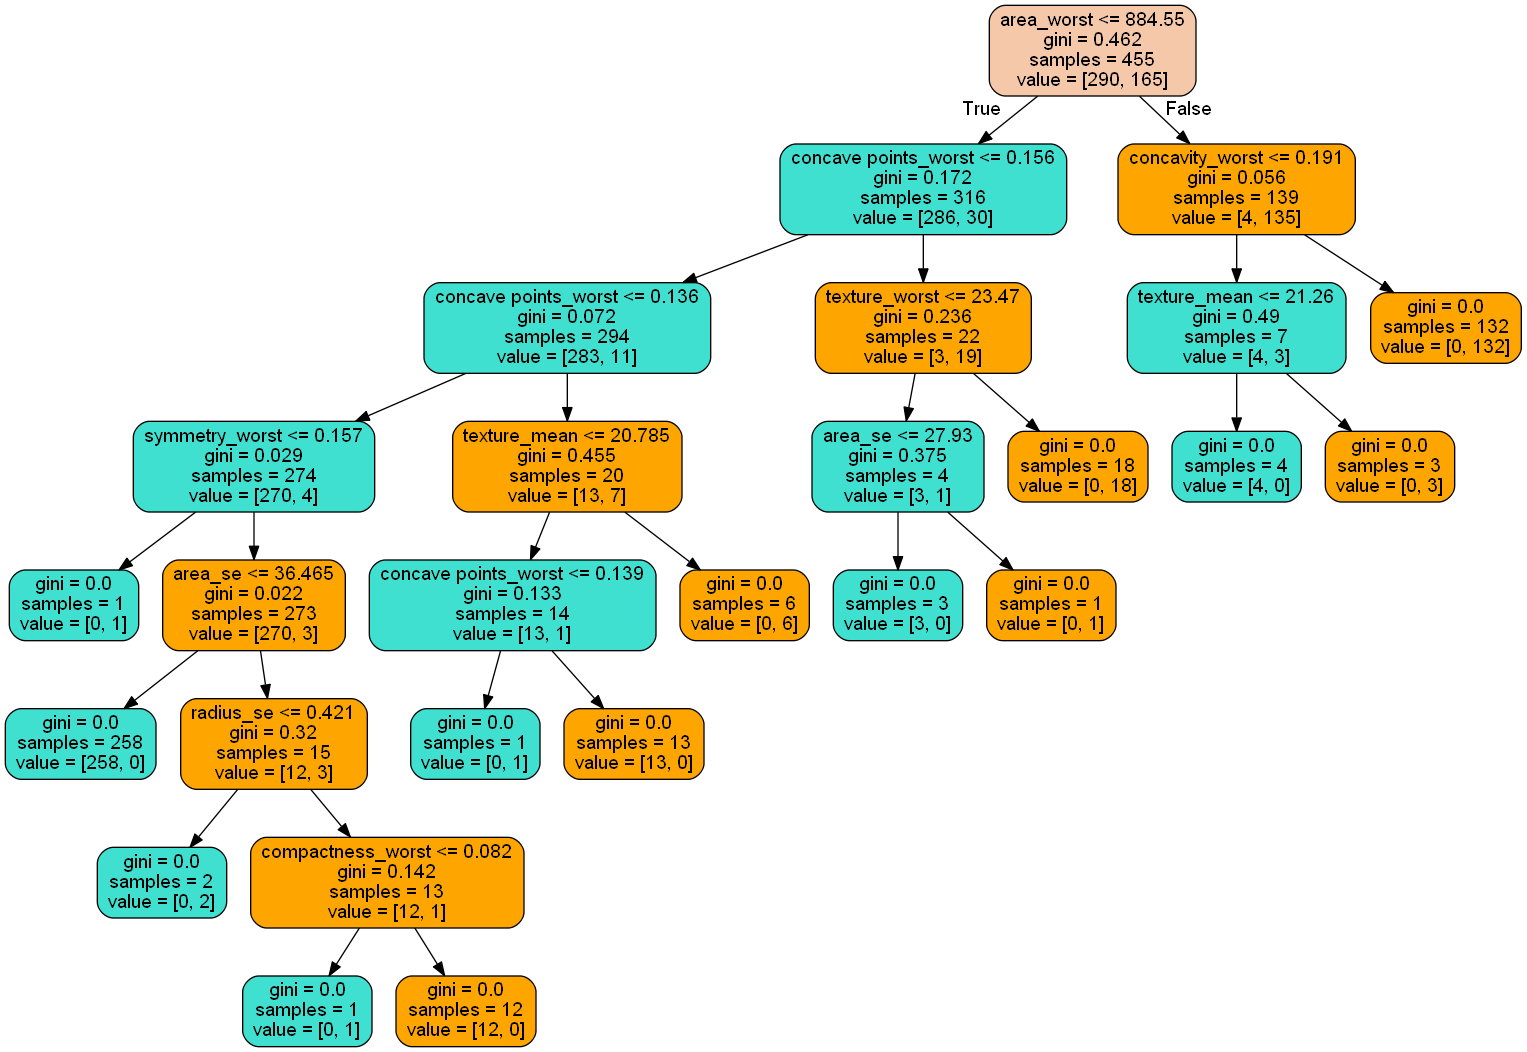

In [48]:
Image(filename='tree.png')
#below is the decision tree from our model

In [49]:
#what is the accuracy of the decision tree
#https://www.datacamp.com/community/tutorials/decision-tree-classification-python
from sklearn import metrics
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))

Accuracy: 0.9122807017543859


In [50]:
#This is a Confusion Matrix from the Decision Tree with the accuracy score

actual = y_test
predicted = y_pred
results = confusion_matrix(actual, predicted) 
print ('Confusion Matrix :')
print(results) 
print("")
print ('Accuracy Score :',accuracy_score(actual, predicted))
print("")
print ('Report : ')
print (classification_report(actual, predicted) )

#according to these results it mispredicted the state of 10 tumors. 

Confusion Matrix :
[[60  7]
 [ 3 44]]

Accuracy Score : 0.9122807017543859

Report : 
             precision    recall  f1-score   support

          0       0.95      0.90      0.92        67
          1       0.86      0.94      0.90        47

avg / total       0.92      0.91      0.91       114



In [51]:
cohen_kappa_score(actual, predicted)

# https://www.statisticshowto.com/cohens-kappa-statistic/
# with a Cohens Kappa Score between 0.81 – 0.99 we can see that this model has a near perfect agreement
# this shows that this model is completely due to the logic of the model and not based off of chance.

# This score is much better than when we had the ID column still included.  This shows that the ID column really impacted
# the model and made the model 'guess' more often than actually predict off of logic.

0.8212605832549389

From the 3 models that we have run through so far it looks like the Random Forest provides the best results at 94.7% accuracy with 6 patients being misdiagnosed.


In [52]:
#https://towardsdatascience.com/hyperparameter-tuning-the-random-forest-in-python-using-scikit-learn-28d2aa77dd74

from pprint import pprint

clf=RandomForestClassifier(n_estimators=100,random_state=1313)

print('Parameters currently in use:\n')
pprint(clf.get_params())


Parameters currently in use:

{'bootstrap': True,
 'class_weight': None,
 'criterion': 'gini',
 'max_depth': None,
 'max_features': 'auto',
 'max_leaf_nodes': None,
 'min_impurity_decrease': 0.0,
 'min_impurity_split': None,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'n_estimators': 100,
 'n_jobs': 1,
 'oob_score': False,
 'random_state': 1313,
 'verbose': 0,
 'warm_start': False}


In [53]:
#https://docs.scipy.org/doc/numpy-1.10.0/reference/generated/numpy.linspace.html
#https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.GridSearchCV.html
#https://towardsdatascience.com/hyperparameter-tuning-the-random-forest-in-python-using-scikit-learn-28d2aa77dd74

import numpy as np
from sklearn.model_selection import GridSearchCV

# grid search for best hyperparameters
# This is our first model that we will attempt to tune
model=RandomForestClassifier(random_state = 1313)
#hyper parameters set this will run through thousands of different parameters to find the best
params_b = {'criterion':['gini','entropy'],
          'n_estimators':[int(x) for x in np.linspace(start = 5, stop = 2000, num = 5)],
          'min_samples_leaf':[1,2,3],
          'min_samples_split':[3,4,5], 
          'random_state':[1313],
          'n_jobs':[-1]}


model_b = GridSearchCV(model, param_grid=params_b, n_jobs=-1)

model_b.fit(X_train,y_train)


GridSearchCV(cv=None, error_score='raise',
       estimator=RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=1,
            oob_score=False, random_state=1313, verbose=0,
            warm_start=False),
       fit_params=None, iid=True, n_jobs=-1,
       param_grid={'criterion': ['gini', 'entropy'], 'n_estimators': [5, 503, 1002, 1501, 2000], 'min_samples_leaf': [1, 2, 3], 'min_samples_split': [3, 4, 5], 'random_state': [1313], 'n_jobs': [-1]},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring=None, verbose=0)

In [54]:
#The best hyper parameters with these params I set are
model_b.best_params_


{'criterion': 'gini',
 'min_samples_leaf': 1,
 'min_samples_split': 3,
 'n_estimators': 503,
 'n_jobs': -1,
 'random_state': 1313}

In [55]:
preds=model_b.predict(X_test)

In [56]:
#The model accuracy is 
model_b.score(X_test, y_test)

0.9473684210526315

In [57]:
actual = y_test
predicted = preds
results = confusion_matrix(actual, predicted) 
print ('Confusion Matrix :')
print(results) 
print("")
print ('Accuracy Score :',accuracy_score(actual, predicted))
print("")
print ('Report : ')
print (classification_report(actual, predicted))

#Here we can see that this model still has the same accuracy score, however it has mispredicted different patient outcomes than
#the first random forest we did.  Since this is dealing with people and medical treatment you have to weigh what is worse
#telling someone that has cancer that they don't or telling someone who does not have cancer that they do.
#my assumption would be telling someone with cancer that they do not have cancer would be worse because they would be losing 
#time that they could be getting treatment because it was misdiagnosed and something that could have been curable now might be 
#terminal.  Going off of that the original random forest was better than this model, even though these have the same accuracy 
#score. 

Confusion Matrix :
[[66  1]
 [ 5 42]]

Accuracy Score : 0.9473684210526315

Report : 
             precision    recall  f1-score   support

          0       0.93      0.99      0.96        67
          1       0.98      0.89      0.93        47

avg / total       0.95      0.95      0.95       114



In [58]:
# grid search for best hyperparameters
# This is our first model that we will attempt to tune
model=RandomForestClassifier(random_state = 1313)
#hyper parameters set this will run through thousands of different parameters  to find the best, I have changed up a few of the 
#params from my first attempt to see if we can get a better outcome.
params_b2 = {'criterion':['gini','entropy'],
          'n_estimators':[int(x) for x in np.linspace(start = 5, stop = 2500, num = 5)],
          'min_samples_leaf':[1,2,3,4],
          'min_samples_split':[2,3,4,5,6,7], 
          'random_state':[1313],
          'n_jobs':[-1]}


model_b2 = GridSearchCV(model, param_grid=params_b2, n_jobs=-1)

model_b2.fit(X_train,y_train)


GridSearchCV(cv=None, error_score='raise',
       estimator=RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=1,
            oob_score=False, random_state=1313, verbose=0,
            warm_start=False),
       fit_params=None, iid=True, n_jobs=-1,
       param_grid={'criterion': ['gini', 'entropy'], 'n_estimators': [5, 628, 1252, 1876, 2500], 'min_samples_leaf': [1, 2, 3, 4], 'min_samples_split': [2, 3, 4, 5, 6, 7], 'random_state': [1313], 'n_jobs': [-1]},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring=None, verbose=0)

In [59]:
#The best hyper parameters with these second set of params I set are
model_b2.best_params_

{'criterion': 'gini',
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'n_estimators': 1252,
 'n_jobs': -1,
 'random_state': 1313}

In [60]:
preds=model_b2.predict(X_test)

In [61]:
#The model accuracy is 
model_b2.score(X_test, y_test)

0.9473684210526315

In [62]:
actual = y_test
predicted = preds
results = confusion_matrix(actual, predicted) 
print ('Confusion Matrix :')
print(results) 
print("")
print ('Accuracy Score :',accuracy_score(actual, predicted))
print("")
print ('Report : ')
print (classification_report(actual, predicted))

#Here we can see that this model still has the same accuracy score, however it has mispredicted different patient outcomes
#than the first random forest we did.

Confusion Matrix :
[[66  1]
 [ 5 42]]

Accuracy Score : 0.9473684210526315

Report : 
             precision    recall  f1-score   support

          0       0.93      0.99      0.96        67
          1       0.98      0.89      0.93        47

avg / total       0.95      0.95      0.95       114



Even after changing some of the parameters our second of hyper parameters, we get the same accuracy score as our first attempt of hyper parameters.  It also appears that the confusion Matrix from the first hyper model is the same as the second hyper model.

# Conclusion

After running 3 different models it turns out that the best mode for predicting if a breast tumor was malignant or benign turns out to the be Random Forest Classifier with an accuracy score of 94.737% with a Cohen Kappa score of 89.07% which is between 0.81 – 0.99 therefor we can see that this model has a near perfect agreement.  In this model there were 6 patients that were misdiagnosed from our model.  2 patients were told that their tumors were cancer when they were actually benign and there were 4 patients that were told their tumors were benign when they were in fact cancer.  

A nearly 95% accuracy score for most models is pretty good but since this is dealing with medical data this is not nearly good enough. 

To try and increase the model’s accuracy score I reran the Random Forest Classifier with sklearn’s Grid Search CV.  This ended up changing the predictions but from 2 false positives to only one false positive but increased the false negatives from 4 to 5.  Once again in my opinion since this is dealing with people and medical treatment you have to weigh what is worse
telling someone that has cancer that they don't or telling someone who does not have cancer that they do.  My assumption would be telling someone with cancer that they do not have cancer would be worse because they would be losing time that they could be getting treatment because it was misdiagnosed and something that could have been curable now might be terminal.  Going off of that the original random forest was better than this model, even though these have the same accuracy score. I updated the hyper parameters again and the result was the same.  The best model that I was able to produce was the random forest.

There is additional work that would need to be done to further perfect this model before it could ever be used in the medical field.  The main thing would be to have a larger data set to test on because with how small the data set is, we are limited.  I think that there is the potential for addition information of the people come in with the tumors that could be beneficial in better predicting if the tumor is cancer but that would change the dataset overall.  The way that the dataset is set up is to solely predict off of the tumor if it is cancer or not but the data set that I am proposing would take the individual into account.  I think that a sister data set of this could be useful by including items such as: Age, sex, history of cancer (of any type), history of smoking, history of drug use, etc.  Once again that would be a similar dataset but in essence would completely be different from this dataset, however I think that additional attributes could be useful in identifying with better accuracy if a breast tumor was malignant or benign.  Due to HIPAA Laws it is hard to have a medical dataset with a good number of detailed attributes because the details cannot in anyway identify who the patient is.  I am not saying that there is anything wrong with the HIPAA Laws, I agree with them, I am just stating that the further study model that I am proposing hypothetically would be hard to obtain.

